# Example notebok for SSH Variability application

This notebook demonstrates how the SSH variability application works when the script is run. 

In [1]:
import os

# Specify the path to your desired working directory
working_directory = '/work/ab0995/a270223/AQUA/diagnostics/SSH/'

# Change the working directory
os.chdir(working_directory)

In [1]:
import sys
# temporary hack to access the diagnostic.
sys.path.insert(0, '../')
from ssh_class import sshVariability

FDB5 binary library not present on system, disabling FDB support.


2023-06-27 11:12:51 :: ssh_logger :: WARNING  -> Time ranges are not equal across models.
2023-06-27 11:12:54 :: ssh_logger :: INFO     -> Dask Dashboard URL: http://127.0.0.1:8787/status
2023-06-27 11:12:54 :: ssh_logger :: INFO     -> Workers=16, Memory=235.37 GiB
2023-06-27 11:12:54 :: Reader :: WARNING  -> No fixes available for model AVISO
2023-06-27 11:12:57 :: ssh_logger :: INFO     -> AVISO data spans from 1993-01-01T00:00:00.000000000 to 2022-06-23T00:00:00.000000000
2023-06-27 11:12:57 :: ssh_logger :: INFO     -> Now computing std on AVISO ssh for the provided timespan
2023-06-27 11:12:57 :: ssh_logger :: INFO     -> computation for AVISO ssh complete, saving output file
/home/a/a270223/mambaforge/envs/aqua/lib/python3.10/site-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
2023-06-27 11:13:30 :: ssh_logger :: INFO     -> Now loading data for other models to compare against AVISO ssh variability
2023-06

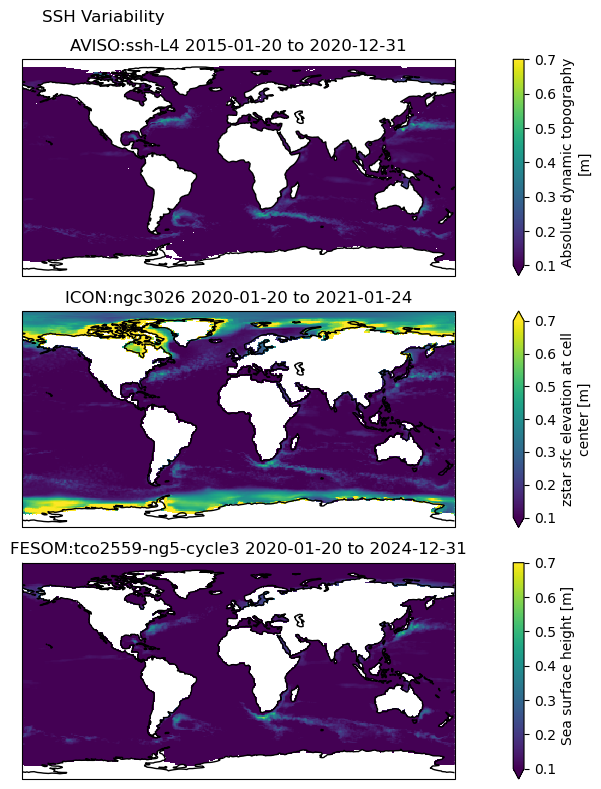

In [2]:
analyzer = sshVariability('../config.yml')
analyzer.run()

Double-Checking the output files.

In [4]:
import xarray as xr

Checking the output files, if they have the data that is required.

In [5]:
# Specify the path to the NetCDF file output
file_path = '../output/AVISO_std_dev.nc'

# Open the NetCDF file using xarray
data = xr.open_dataset(file_path)
data

<xarray.Dataset>
Dimensions:    (latitude: 720, longitude: 1440)
Coordinates:
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
Data variables:
    adt        (latitude, longitude) float64 ...

In [6]:
# Specify the path to the NetCDF file output
file_path = '../output/FESOM_std_dev.nc'

# Open the NetCDF file using xarray
data = xr.open_dataset(file_path)
data

<xarray.Dataset>
Dimensions:  (nod2: 7402886)
Dimensions without coordinates: nod2
Data variables:
    ssh      (nod2) float32 ...

In [7]:
# Specify the path to the NetCDF file output
file_path = '../output/ICON_std_dev.nc'

# Open the NetCDF file using xarray
data = xr.open_dataset(file_path)
data

<xarray.Dataset>
Dimensions:  (cell: 196608)
Dimensions without coordinates: cell
Data variables:
    zos      (cell) float32 ...